In [ ]:
from glob import glob
import logging
import os
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import xarray as xr

In [7]:
# set up directories and file names

binarydir = './delayed_raw/'
rawdir = './delayed_rawnc/'
cacdir = './cac/'
sensorlist = './socco461_sensors.txt'
deploymentyaml = './deployment.yml'
l1tsdir = './L0-timeseries/'
profiledir = './L0-profiles/'
griddir = './L0-gridfiles/'
scisuffix = 'EBD'
glidersuffix = 'DBD'

In [12]:
# convert binary to raw netcdf
slocum.binary_to_rawnc(
    binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
    incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

Could not do parsing for ./delayed_raw/06340000.DBD
list index out of range
Some files could not be parsed:
./delayed_raw/06340000.DBD
Could not do parsing for ./delayed_raw/06340000.EBD
list index out of range
Some files could not be parsed:
./delayed_raw/06340000.EBD


In [13]:
#merge raw netcdf files
slocum.merge_rawnc(rawdir, rawdir, deploymentyaml,
                   scisuffix=scisuffix, glidersuffix=glidersuffix)

In [15]:
# create a timeseries from raw files
outname = slocum.raw_to_timeseries(
    rawdir, l1tsdir, deploymentyaml,
    profile_filt_time=100, profile_min_time=300)

In [16]:
# extract timeseries profiles 
ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

In [17]:
# make gridfiles from profiles
outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)

# example grid plot
# pgutils.example_gridplot(outname2, './gridplot2.png', ylim=[150, 0],
#                          toplot=['salinity','par',
#                                  ])
# example plot not working because expects potential density as a variable in the gridfile

In [18]:
ds=xr.open_dataset(outname2)

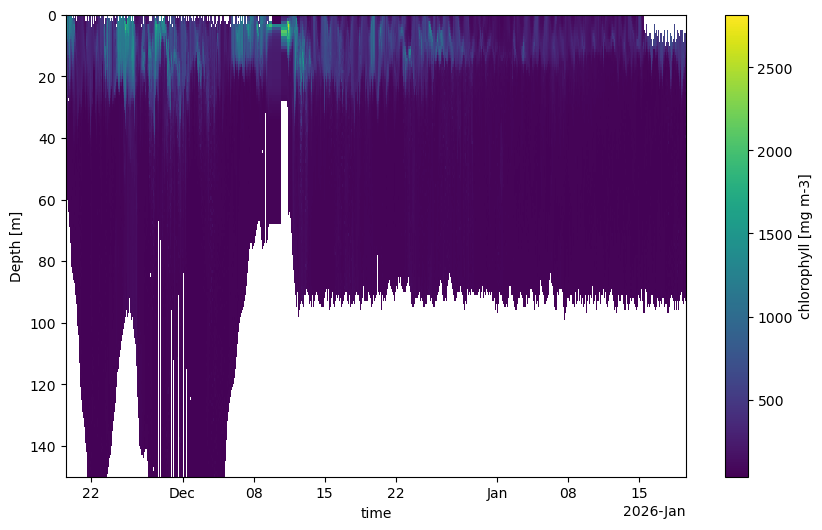

In [20]:
import matplotlib.pyplot as plt

ds.chlorophyll.plot(figsize=(10,6), ylim=(150,0))

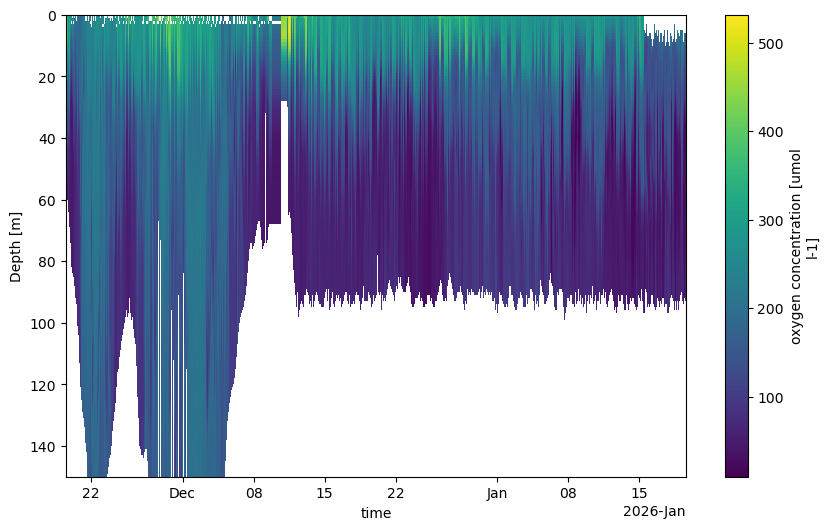

In [24]:
ds.oxygen_concentration.plot(figsize=(10,6), ylim=(150,0))

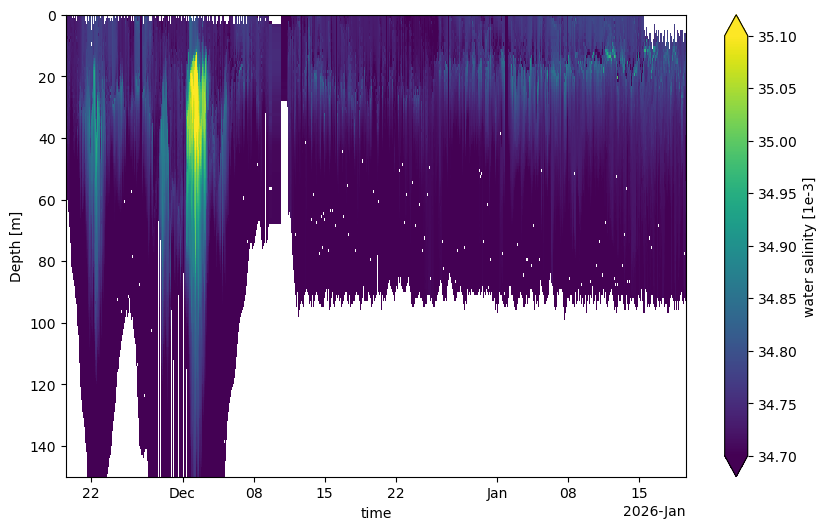

In [30]:
ds.salinity.plot(figsize=(10,6), ylim=(150,0),vmin=34.7,vmax=35.1)

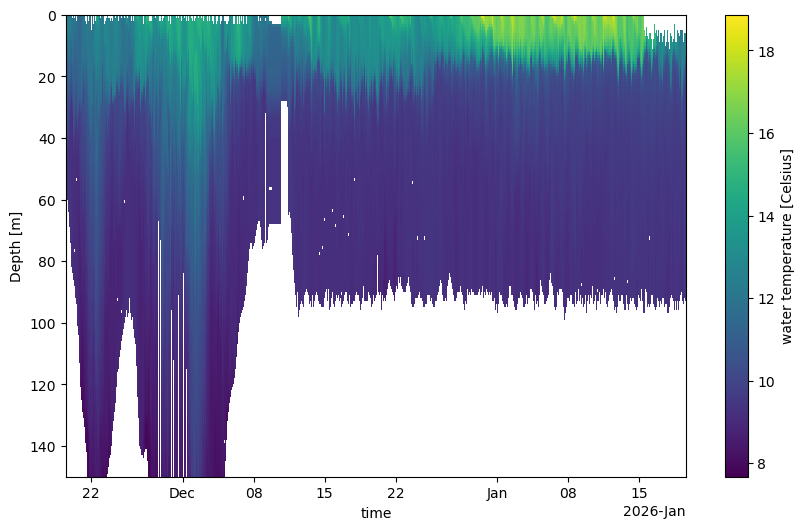

In [31]:
ds.temperature.plot(figsize=(10,6), ylim=(150,0))

In [32]:
ds=xr.open_mfdataset('./delayed_rawnc/*ebd.nc', combine='by_coords')

In [ ]:
dsdbd = dbdreader.

<xarray.Dataset> Size: 655MB
Dimensions:                (_ind: 7443226)
Coordinates:
  * _ind                   (_ind) float64 60MB 0.0 1.0 ... 6.422e+12 6.422e+12
Data variables:
    time                   (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_bb2flsv8_b470_sig  (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_bb2flsv8_b700_sig  (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_bb2flsv8_chl_sig   (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_m_present_time     (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_oxy4_oxygen        (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_oxy4_saturation    (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_water_cond         (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_water_pressure     (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
    sci_water_temp         (_ind) float64 60MB dask.array<chunksize=(3721613,), meta=np.ndarray>
Attributes: (12/18)
    num_ascii_tags:         14
    activeSensorList:       {'name': 'sci_ad2cp_file_state', 'unit': 'enum', ...
    dbd_label:              DBD(dinkum_binary_data)file
    encoding_ver:           5
    all_sensors:            T
    the8x3_filename:        06290000
    ...                     ...
    state_bytes_per_cycle:  19
    sensor_list_crc:        4ae1e9aa
    sensor_list_factored:   1
    _dbdfiletimestamp:      1763555116.0
    _processing:            pyglider.slocum python library
    Conventions:            None

## output list of variables in raw dbd file

In [ ]:
import dbdreader
ebd = dbdreader.MultiDBD(
        pattern="./delayed_raw/06421936.EBD", cacheDir='./cac')

In [ ]:
import pandas as pd
df_sci = pd.DataFrame()
for i, p in enumerate(ebd.parameterNames["sci"]):
    df_sci[p] = key_array[i + 2]

In [64]:
ebd.parameterNames["sci"]

['sci_ad2cp_file_state',
 'sci_badd_error',
 'sci_badd_finished',
 'sci_badd_n_tries_to_connect',
 'sci_badd_power_on',
 'sci_badd_target_range',
 'sci_bb2flsv8_b470_ref',
 'sci_bb2flsv8_b470_scaled',
 'sci_bb2flsv8_b470_sig',
 'sci_bb2flsv8_b700_ref',
 'sci_bb2flsv8_b700_scaled',
 'sci_bb2flsv8_b700_sig',
 'sci_bb2flsv8_chl_ref',
 'sci_bb2flsv8_chl_scaled',
 'sci_bb2flsv8_chl_sig',
 'sci_bb2flsv8_is_installed',
 'sci_bb2flsv8_therm',
 'sci_bb2flsv8_timestamp',
 'sci_ctd41cp_is_installed',
 'sci_ctd41cp_timestamp',
 'sci_logger_is_installed',
 'sci_logger_status',
 'sci_m_disk_free',
 'sci_m_disk_usage',
 'sci_m_free_heap',
 'sci_m_min_free_heap',
 'sci_m_min_spare_heap',
 'sci_m_present_secs_into_mission',
 'sci_m_present_time',
 'sci_m_science_on',
 'sci_m_spare_heap',
 'sci_oxy4_c1amp',
 'sci_oxy4_c1rph',
 'sci_oxy4_c2amp',
 'sci_oxy4_c2rph',
 'sci_oxy4_calphase',
 'sci_oxy4_is_installed',
 'sci_oxy4_oxygen',
 'sci_oxy4_rawtemp',
 'sci_oxy4_saturation',
 'sci_oxy4_tcphase',
 'sci_ox

In [53]:
df_sci.keys()

Index(['sci_ad2cp_file_state', 'sci_badd_error', 'sci_badd_finished',
       'sci_badd_n_tries_to_connect', 'sci_badd_power_on',
       'sci_badd_target_range', 'sci_bb2flsv8_b470_ref',
       'sci_bb2flsv8_b470_scaled', 'sci_bb2flsv8_b470_sig',
       'sci_bb2flsv8_b700_ref', 'sci_bb2flsv8_b700_scaled',
       'sci_bb2flsv8_b700_sig', 'sci_bb2flsv8_chl_ref',
       'sci_bb2flsv8_chl_scaled', 'sci_bb2flsv8_chl_sig',
       'sci_bb2flsv8_is_installed', 'sci_bb2flsv8_therm',
       'sci_bb2flsv8_timestamp', 'sci_ctd41cp_is_installed',
       'sci_ctd41cp_timestamp', 'sci_logger_is_installed', 'sci_logger_status',
       'sci_m_disk_free', 'sci_m_disk_usage', 'sci_m_free_heap',
       'sci_m_min_free_heap', 'sci_m_min_spare_heap',
       'sci_m_present_secs_into_mission', 'sci_m_present_time',
       'sci_m_science_on', 'sci_m_spare_heap', 'sci_oxy4_c1amp',
       'sci_oxy4_c1rph', 'sci_oxy4_c2amp', 'sci_oxy4_c2rph',
       'sci_oxy4_calphase', 'sci_oxy4_is_installed', 'sci_oxy4_oxygen',


In [67]:
dbd = dbdreader.MultiDBD(
        pattern="./delayed_raw/06421936.DBD", cacheDir='./cac')
# df_eng = pd.DataFrame()
# for i, p in enumerate(dbd.parameterNames["eng"]):
#     df_eng[p] = key_array[i + 2]

dbd.parameterNames["eng"]

['c_FIRe_num_fields_to_send',
 'c_FIRe_on',
 'c_acoustic_modem_target_id',
 'c_ad2cp_on',
 'c_air_pump',
 'c_alt_recall',
 'c_alt_time',
 'c_argos_on',
 'c_att_debug',
 'c_att_recall',
 'c_att_time',
 'c_autoballast_bpump_state',
 'c_autoballast_state',
 'c_autoballast_volume',
 'c_autobaud_max_ber',
 'c_auvb_num_fields_to_send',
 'c_auvb_on',
 'c_azfp_on',
 'c_badd_clear_remote_data',
 'c_badd_data_min_rate',
 'c_badd_data_min_tries',
 'c_badd_datacol_status_secs',
 'c_badd_debug',
 'c_badd_download_range',
 'c_badd_initial_wait_secs',
 'c_badd_input_parse_secs',
 'c_badd_mode',
 'c_badd_on',
 'c_badd_range_secs',
 'c_badd_range_tries',
 'c_badd_retry_wait_secs',
 'c_badd_session_secs',
 'c_badd_target_id',
 'c_badd_transaction_num',
 'c_ballast_pumped',
 'c_bam_chars_to_get_before_surfacing',
 'c_bam_cmd_parse_secs',
 'c_bam_datacol_report_secs',
 'c_bam_inactivity_secs',
 'c_bam_mode',
 'c_bam_number_of_echos',
 'c_bam_on',
 'c_bam_target_id',
 'c_bam_update_secs',
 'c_battpos',
 'c